In [41]:
from xgboostlss.model import *
from xgboostlss.distributions.Expectile import *
from xgboostlss.datasets.data_loader import load_simulated_gaussian_data
import seaborn as sns
import multiprocessing
import plotnine
from plotnine import *
plotnine.options.figure_size = (20, 10)
import matplotlib.pyplot as plt

In [17]:

train, test = load_simulated_gaussian_data()
n_cpu = multiprocessing.cpu_count()

X_train, y_train = train.filter(regex="x"), train["y"].values
X_test, y_test = test.filter(regex="x"), test["y"].values

dtrain = xgb.DMatrix(X_train, label=y_train, nthread=n_cpu)
dtest = xgb.DMatrix(X_test, nthread=n_cpu)


In [44]:
opt_param={
    'eta': 0.7298897353706068,
    'max_depth': 10,
    'gamma': 5.90940257278992e-06,
    'subsample': 0.9810129322454306,
    'colsample_bytree': 0.9546244491014185,
    'min_child_weight': 113.32324947486019,
    'booster': 'gbtree',
    'opt_rounds': 30}

In [45]:
np.random.seed(123)

xgblss = XGBoostLSS(
    Expectile(stabilization="None",         # Options are "None", "MAD", "L2".
              expectiles = [0.05,0.5, 0.95])    # List of expectiles to be estimated.
)

opt_params = opt_param.copy()
n_rounds = opt_params["opt_rounds"]
del opt_params["opt_rounds"]

# Train Model with optimized hyperparameters
xgblss=xgblss.train(opt_params,
             dtrain,
             num_boost_round=n_rounds
             )

In [46]:
pred_expectile_test = xgblss.predict(dtest)
pred_expectile_train = xgblss.predict(dtrain)

In [47]:
test['expectile_0.05']=pred_expectile_test[:,0]
test['expectile_0.5']=pred_expectile_test[:,1]
test['expectile_0.95']=pred_expectile_test[:,2]

train['expectile_0.05']=pred_expectile_train[:,0]
train['expectile_0.5']=pred_expectile_train[:,1]
train['expectile_0.95']=pred_expectile_train[:,2]

Text(0.5, 1.0, 'Train Predictions')

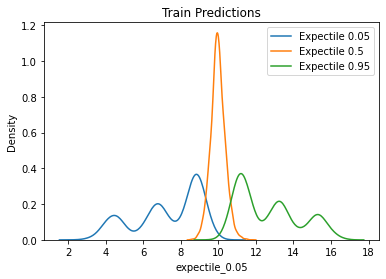

In [48]:
sns.kdeplot(train['expectile_0.05'],label='Expectile 0.05')
sns.kdeplot(train['expectile_0.5'],label='Expectile 0.5')
sns.kdeplot(train['expectile_0.95'],label='Expectile 0.95')
plt.legend()
plt.title("Train Predictions")

Text(0.5, 1.0, 'Test Predictions')

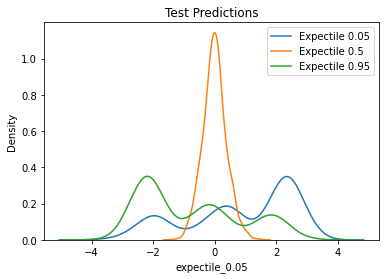

In [49]:
sns.kdeplot(test['expectile_0.05'],label='Expectile 0.05')
sns.kdeplot(test['expectile_0.5'],label='Expectile 0.5')
sns.kdeplot(test['expectile_0.95'],label='Expectile 0.95')
plt.legend()
plt.title("Test Predictions")